In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv


In [2]:
df = pd.read_csv("/kaggle/input/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv")
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [3]:
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset contains 568630 rows and 31 columns.


In [4]:
print(df["Class"].value_counts(normalize=True) * 100)

Class
0    50.0
1    50.0
Name: proportion, dtype: float64


In [5]:
df.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

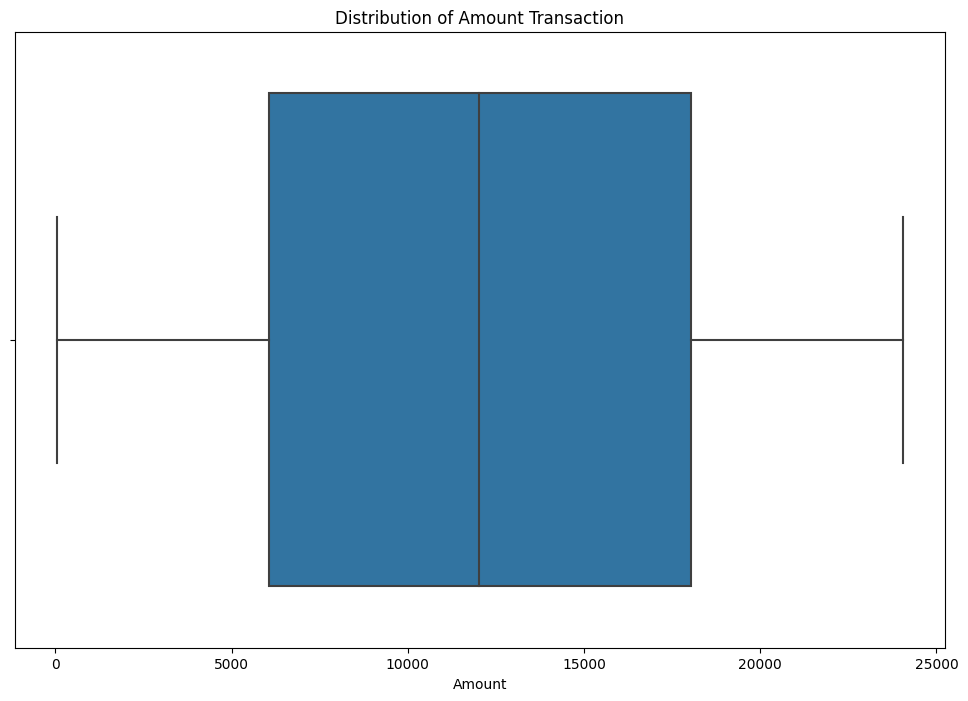

In [8]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df['Amount'])
plt.title("Distribution of Amount Transaction")
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


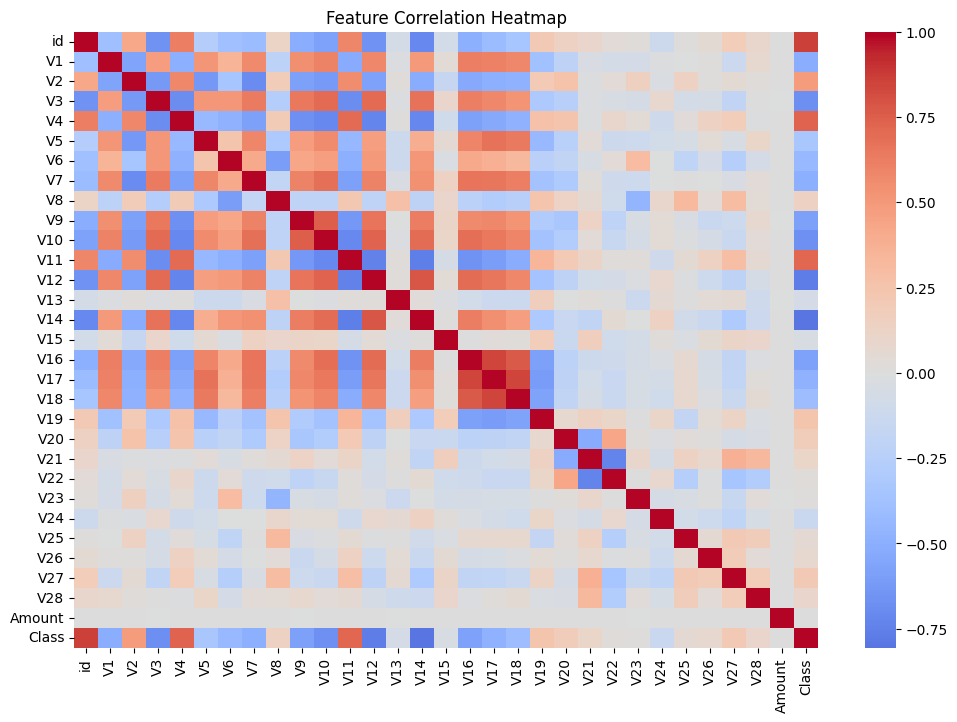

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap = 'coolwarm', center =0)
plt.title("Feature Correlation Heatmap")
plt.show()

In [10]:
df.corr()["Class"].sort_values(ascending=False)


Class     1.000000
id        0.864283
V4        0.735981
V11       0.724278
V2        0.491878
V19       0.244081
V27       0.214002
V20       0.179851
V8        0.144294
V21       0.109640
V28       0.102024
V26       0.071052
V25       0.061847
V22       0.014098
V23       0.010255
Amount    0.002261
V15      -0.037948
V13      -0.071105
V24      -0.130107
V5       -0.338639
V18      -0.410091
V6       -0.435088
V17      -0.476377
V7       -0.491234
V1       -0.505761
V16      -0.573511
V9       -0.585522
V10      -0.673665
V3       -0.682095
V12      -0.768579
V14      -0.805669
Name: Class, dtype: float64

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])

In [12]:
from sklearn.model_selection import train_test_split

x= df.drop(['Class', 'id'], axis=1)
y = df['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

input_layer = Input(shape=(x_train.shape[1],))

encoded = Dense(14, activation ='relu')(input_layer)
encoded = Dense(7, activation = 'relu')(encoded)

bottleneck = Dense(3, activation ='relu')(encoded)

decoded = Dense(7, activation='relu')(bottleneck)
decoded = Dense(14, activation='relu')(decoded)
decoded = Dense(x_train.shape[1], activation='sigmoid')(decoded)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.fit(x_train, x_train, epochs=10, batch_size=32, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - loss: 0.9137 - val_loss: 0.8267
Epoch 2/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - loss: 0.8076 - val_loss: 0.8054
Epoch 3/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - loss: 0.8038 - val_loss: 0.8027
Epoch 4/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - loss: 0.7930 - val_loss: 0.8001
Epoch 5/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - loss: 0.7932 - val_loss: 0.7983
Epoch 6/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - loss: 0.7963 - val_loss: 0.7984
Epoch 7/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - loss: 0.7960 - val_loss: 0.7976
Epoch 8/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - loss: 0.7858 - val_loss: 0.7962
Epoch 9/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - loss: 0.7920 - val_loss: 0.7944
Epoch 10/10
14216/14216 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - loss: 0.7883 - val_loss: 0.7939


In [14]:
x_pred = autoencoder.predict(x_test)

mse = np.mean(np.power(x_test - x_pred, 2), axis=1)

threshold = np.percentile(mse, 95)
fraud_predictions = (mse> threshold).astype(int)

from sklearn.metrics import classification_report
print(classification_report(y_test, fraud_predictions))

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
              precision    recall  f1-score   support

           0       0.52      0.99      0.68     56750
           1       0.90      0.09      0.16     56976

    accuracy                           0.54    113726
   macro avg       0.71      0.54      0.42    113726
weighted avg       0.71      0.54      0.42    113726



In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
df["Cluster"] = kmeans.fit_predict(x)

# Check fraud distribution per cluster
print(df.groupby("Cluster")["Class"].value_counts(normalize=True))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster  Class
0        0        0.80958
         1        0.19042
1        1        0.99972
         0        0.00028
Name: proportion, dtype: float64


In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(columns=["Class"]))  


In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)  
df_pca = pca.fit_transform(df_scaled)


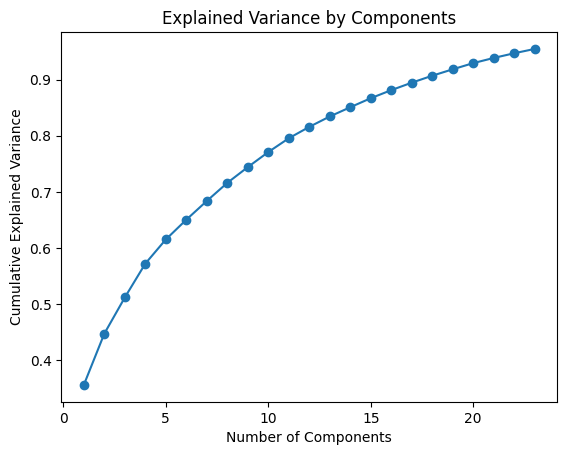

In [18]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.show()
